# Dynamic Aperture
Thanks to SciBmad's support for both explicit Single Instruction, Multiple Data (SIMD) on the CPU and Single Instruction, Multiple Thread (SIMT) on the GPU, highly-parallelized and performant tracking simulations can be run on all types of architectures. Here we will do a dynamic aperture scan of the v6.3.1 Electron Storage Ring (ESR) of the Electron-Ion Collider (EIC) using SciBmad's `dynamic_aperture` function, in this notebook on the CPU.

In [1]:
using SciBmad, CairoMakie

In [2]:
include("../../lattices/esr-v6.3.1-tapered.jl");

In [3]:
# Turn on radiation, do 2nd order Yoshida for speed
tm = Yoshida(order=2, radiation_damping_on=true)
foreach(t->t.tracking_method=tm, ring.line)

In [4]:
tw = twiss(ring)

Twiss:
 coasting_beam = false
 tunes[1:3]    = [Qx, Qy, Qz]
 table         has columns: beamline_index, name, s, phi_1, beta_1, alpha_1, phi_2, beta_2, alpha_2, phi_3, eta_1, etap_1, eta_2, etap_2, zeta_1, zetap_1, zeta_2, zetap_2, slip, gamma_c, c11, c12, c21, c22, orbit_x, orbit_px, orbit_y, orbit_py, orbit_z, orbit_pz

In [5]:
tw.tunes

3-element StaticArraysCore.SVector{3, Float64} with indices SOneTo(3):
  0.08009187398937781
  0.14016318839719952
 -0.04999949805227429

In [6]:
x_norm_da, y_norm_da = dynamic_aperture(
    ring;
    n_turns = 2000,
    emit_1  = 30e-9,
    emit_2  = 15e-9,
    emit_3  = 7.30474E-06,
    n_r     = 30,
    n_theta = 65,
    max_sig_x = 15,
    max_sig_y = 22,
    deltas = (0:0.1:1).*10^-2,
    output_file="beam.txt",
);

Initializing dynamic_aperture with 20746 particles
Finished turn 2000 out of 2000
Tracking complete


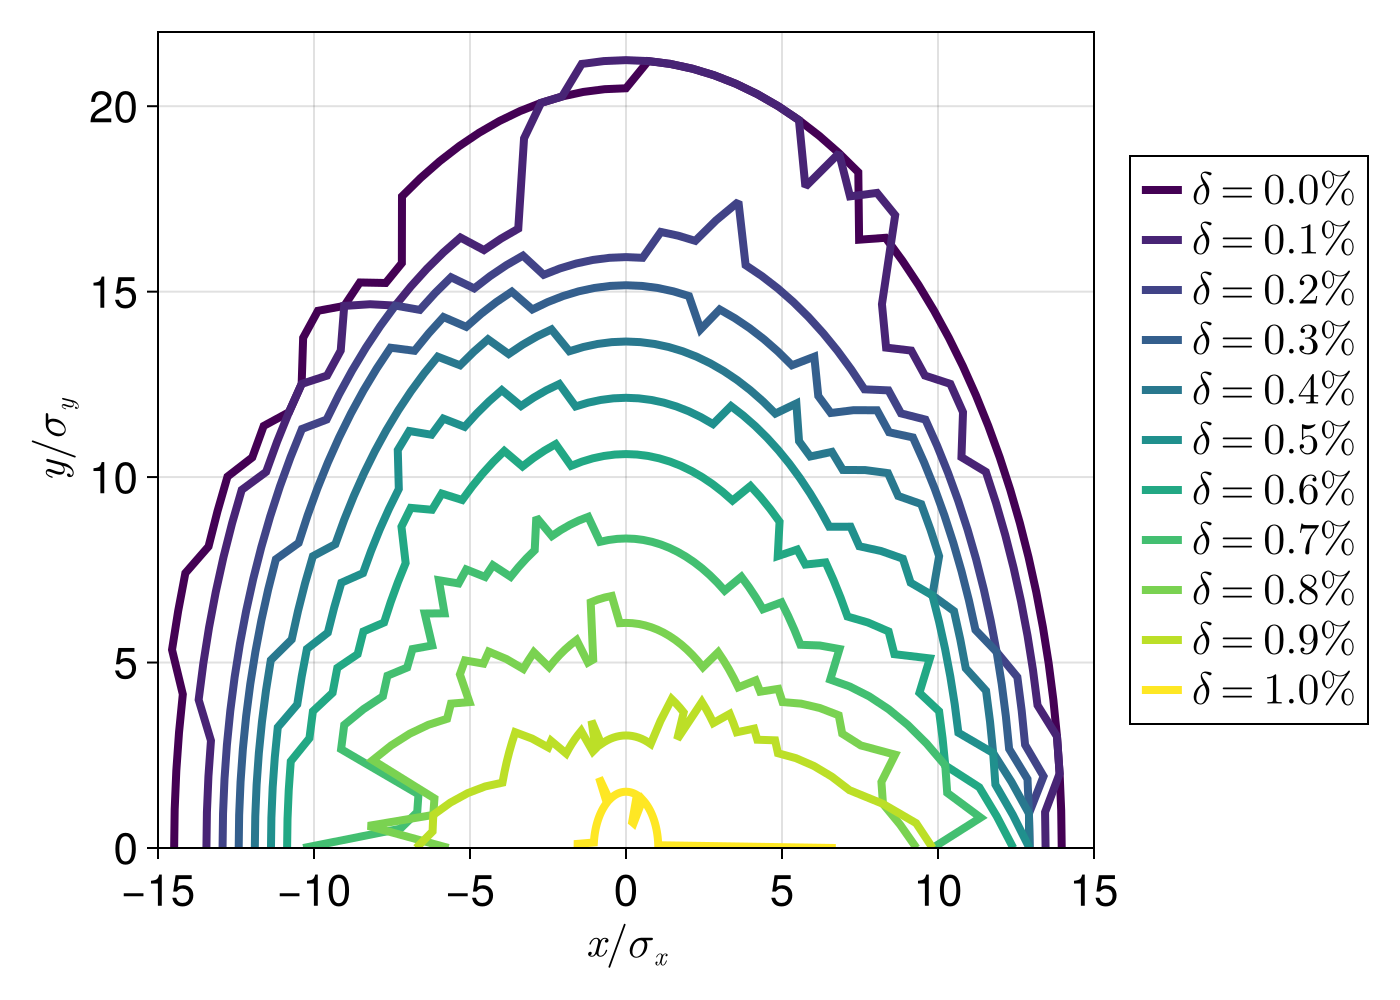

In [7]:
f2 = Figure(fontsize=22, size=(700,500));
ax = Axis(f2[1, 1], xlabel=L"x/\sigma_x", ylabel=L"y/\sigma_y", limits=(-15,15,0,22))
deltas = (0:0.1:1).*10^-2
for i in 1:length(deltas)
    lines!(x_norm_da[:,i], y_norm_da[:,i], linewidth=4, color=i, colorrange=(1,11), label=L"\delta=%$(round(deltas[i]*10^2; sigdigits=1))\%")
end
Legend(f2[1, 2], ax)
display(f2);